<a href="https://colab.research.google.com/github/mishrasiddhant001/Projects/blob/master/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraires

---



In [ ]:
import  numpy as np
# used for numpy arrays
import  pandas as pd
# used for making data-frames(structured table) #data will be in csv file
import  matplotlib.pyplot as plt
# used for plotting graphs
import  seaborn as sns
# used for data visualization
from sklearn.model_selection import train_test_split
# train_test_split - a class for splitting datasets into training & testing sets
from sklearn.ensemble import RandomForestRegressor
# is a class used for creating a random forest regression model
from sklearn import metrics
# used for evaluating our model to find error/accuracy score

Data collection(CSV file) and processing

In [ ]:
#load the csv file to a pandas data_frame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows from data_frame
gold_data.head()  #method used to display the first few rows (by deafault 5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


**NOTES**

SPX - Standard & Poor's 500, a stock market index that measures the performance of 500 large companies listed on stock exchange in US.

GLD - GLD refers to the Closing market price of one share of gold ETF.

USO - Closing prices of the United States Oil Fund.

SLV - Closing prices of one share of Silver ETF.

EUR/USD - Exchange rate between the Euro (EUR) and US Dollar (USD).

In [ ]:
#print last 5 rows from data_frame
gold_data.tail()  #method used to display the last few rows (by deafault 5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#basic info of CSV file
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


from above result we can conclude that this data frame have 2290 entires and and no null values

In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

from above result we can conclude that this data frame have no missing values

In [ ]:
#getting the statistical measures of the data
gold_data.describe()
#to provide description about data like mean vlaues, standard deviation and minimum and maximum values of each colmun individually

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Find correlation between columns of data set:
1. +ve realtion (If one variable decrease then the other will decrease and vice versa/ you can also say that two variables with +ve correlation value are directly proportional)
2. -ve relation (If one variable decrease then the other will increase and vice versa/ you can also say that two variables with -ve correlation value are inversly proportional)

In [ ]:
correlation_coff = gold_data.corr()
#.corr() function generates a matrix (correlation matrix)

<ipython-input-55-0926d059e00b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coff = gold_data.corr()


gold_data.corr() calculates correlation coefficients between the any two columns of the DataFrame.

Correlation coefficient measures the strength and direction of dependency of  two variables, ranging from -1 to 1.

1 indicates a perfect positive correlation & -1 indicates a perfect negative correlation, and 0 indicates no correlation.

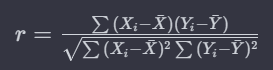


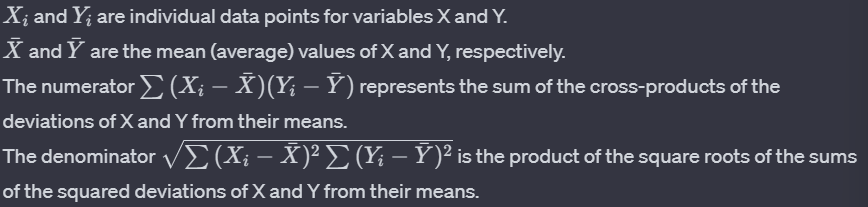

We plot the correlation cofficient matrix genreated By using
correlation_coff = gold_data.corr()

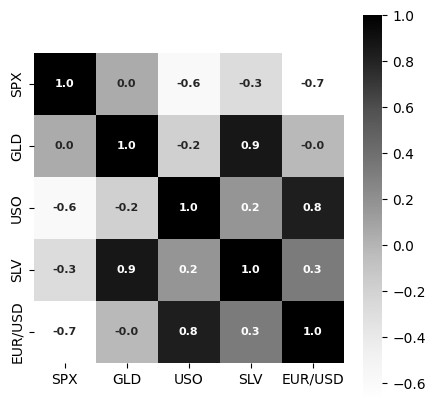

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(5, 5))  # Set up a figure with a size of 5x5 inches

# Seaborn function is used to create a heatmap.
sns.heatmap(
            correlation_coff,  # Use the correlation matrix as the data
            cbar=True,    # Include a color bar on the side which represent the maximum and minimum values and all the other values between them using differnet shades
            square=True,  # Ensure that the cells of heatmap is square
            fmt='.1f',    # Format the annotations values to one decimal place
            annot=True,   # Display the correlation values in each cell
            annot_kws={'size': 8, 'weight': 'bold'},  # annotation keyword arguments set the size of annotations to 8 point
            cmap='Greys'   # Use the 'Greys' color map for the heatmap
            )
# Display the heatmap
plt.show()

In [ ]:
# correlation values of GLD
print(correlation_coff['GLD']) # prints the correlation values between the GLD column and all other columns in the DataFrame

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-58-278d10a52c90>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color = 'grey') # or use displot/distplot


<Axes: xlabel='GLD', ylabel='Density'>

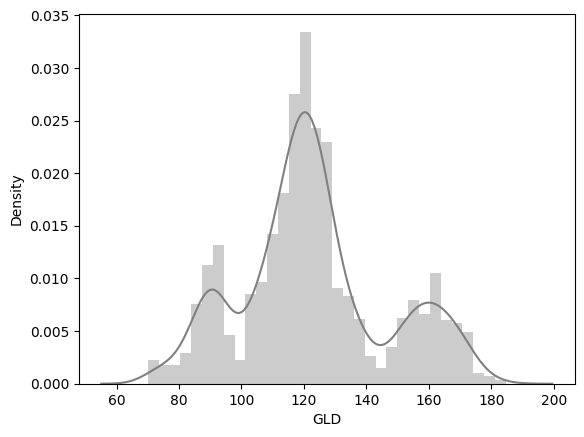

In [ ]:
# check the distribution of the gold price
sns.distplot(gold_data['GLD'],color = 'grey') # or use displot/distplot

Split the Gold from other cloumn's

In [ ]:
X = gold_data.drop(['Date','GLD'],axis =1)
# create a new DataFrame X by dropping the 'Date' and 'GLD' columns from the original DataFrame.
Y = gold_data['GLD']
# create a series Y containing the values from the 'GLD' column it represents the target variable (dependent variable) that we want to predict.

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Split data into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(
                  X,  # Feature matrix we created after dropping gold and dates (in original data frame)
                  Y,  # Target variable ( variable we want to predict)
                  test_size= 0.2,  # Percentage of data to use for testing 20% of data for testing, and  80% for training
                  random_state= 2  # Seed for reproducibility ensures that the random split of the data is same every time to obtain consistent results each time we split the data
                )

Model training: [Random forest regessor](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ZFuMI_HrI3jt2Wlay73IUQ.png)

A random forest is a estimator that fits a number of decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy.

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)
# create a RandomForestRegressor class from scikit-learn The n_estimators  is set to 100, which shows the number of trees in the random forest.

In [ ]:
#training the model
# This fits the RandomForestRegressor model using the training data.
# X_train represents the features (independent variables), and Y_train represents the target variable (dependent variable) that the model will learn to predict.
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
 # 'test_data_prediction' is  be a NumPy array containing the predicted values for the target variable (GLD) based on the features in the test set (X_test).
print(test_data_prediction)

[168.61759952  81.75869997 116.01290029 127.6271006  120.65680117
 154.90869746 150.50639856 126.15490022 117.39449882 125.98530073
 116.70940098 171.47000077 142.16929888 167.51359835 115.12039982
 117.44110047 138.84600294 169.8037004  159.19720311 158.53339942
 154.93949993 125.47930051 176.6129005  157.20570299 125.17550055
  93.67389912  78.57940005 120.65840021 119.04829907 167.51949994
  88.06460031 125.4469002   91.12600074 117.57570003 121.12859918
 136.69760074 115.30400116 114.90390077 146.32859986 107.1818009
 104.39090242  87.26939776 126.45990069 118.01889957 151.85419921
 119.65930026 108.42620023 108.35269827  93.14460068 127.03739801
  75.6193003  113.66199926 121.3102003  111.35819905 118.79319888
 120.72339928 159.31090078 167.68290104 147.26469677  85.72189854
  94.53070059  86.82049912  90.52980024 119.0664006  126.41390067
 127.5944001  170.06609923 122.13969912 117.38479858  98.68700032
 168.37440087 142.94819861 131.64280238 121.25740226 121.28939953
 119.606600

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ",error_score)

#calculate the R2 score, which is a measure of how well the prediction is made by our model explain the variance in the actual values.
# The R2 score ranges from 0 to 1, where a higher value indicates a better fit. A negative R2 score suggests that the model is performing worse than a simple mean-based model

R squared error :  0.989281676630094


Compare the Actual and predicted values in a plot

In [ ]:
Y_test = list(Y_test)

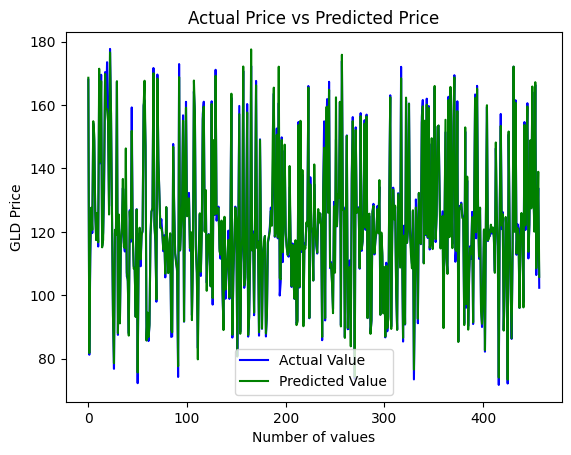

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color= 'green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()